In [1]:
import pandas as pd
import re

In [2]:
df= pd.read_csv('./data/sentence_data.csv')

# Preprocessing

1) Drop all Nan row

In [3]:
#drop all Nan
df.dropna(inplace= True)
df

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,Negative
1,1,Levallois-Perret,France,No Negative,Negative
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,really nothing
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Location was good
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
...,...,...,...,...,...
1755616,1024936,Amsterdam,Netherlands,Could hear other people shutting doors but di...,Could hear other people shutting doors but did...
1755617,1024938,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Hotel is showing signs of wear
1755618,1024938,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Room furniture was worn and shabby bed amazing...
1755619,1024938,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Probably still worth staying for the location


In [4]:
samples=df.copy(deep=True)
sample=samples[:10000]
sample

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,Negative
1,1,Levallois-Perret,France,No Negative,Negative
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,really nothing
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Location was good
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
...,...,...,...,...,...
9995,5853,London,United Kingdom,Wonderful hotel I would highly recommend Beau...,fantastic staff and facilities Fantastic locat...
9996,5854,London,United Kingdom,Fairly quiet location Transport links close b...,Fairly quiet location Transport links close by...
9997,5855,Kensington,United Kingdom,Location great Very clean and comfortable,Location great Very clean and comfortable
9998,5856,Chelsea,United Kingdom,Wifi and cell connection was low,Wifi and cell connection was low


2) Removing stopwords and splitting into corpus

In [5]:
from nltk.corpus import stopwords
stop_list = stopwords.words('english')

In [6]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [word for word in x.split() if word not in stop_list])

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
sample

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,[Negative]
1,1,Levallois-Perret,France,No Negative,[Negative]
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,"[really, nothing]"
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Location, good]"
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stayed, I, e, 9yrs, ago, shop, longer, ..."
...,...,...,...,...,...
9995,5853,London,United Kingdom,Wonderful hotel I would highly recommend Beau...,"[fantastic, staff, facilities, Fantastic, loca..."
9996,5854,London,United Kingdom,Fairly quiet location Transport links close b...,"[Fairly, quiet, location, Transport, links, cl..."
9997,5855,Kensington,United Kingdom,Location great Very clean and comfortable,"[Location, great, Very, clean, comfortable]"
9998,5856,Chelsea,United Kingdom,Wifi and cell connection was low,"[Wifi, cell, connection, low]"


3) Lemmitisation

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [9]:
df_lem=sample.copy()

In [10]:
df_lem

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,[Negative]
1,1,Levallois-Perret,France,No Negative,[Negative]
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,"[really, nothing]"
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Location, good]"
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stayed, I, e, 9yrs, ago, shop, longer, ..."
...,...,...,...,...,...
9995,5853,London,United Kingdom,Wonderful hotel I would highly recommend Beau...,"[fantastic, staff, facilities, Fantastic, loca..."
9996,5854,London,United Kingdom,Fairly quiet location Transport links close b...,"[Fairly, quiet, location, Transport, links, cl..."
9997,5855,Kensington,United Kingdom,Location great Very clean and comfortable,"[Location, great, Very, clean, comfortable]"
9998,5856,Chelsea,United Kingdom,Wifi and cell connection was low,"[Wifi, cell, connection, low]"


In [11]:
df_lem['sent_list']=df_lem['sent_list'].apply(lambda doc: [lemmatizer.lemmatize(w) for w in doc])

In [12]:
df_lem

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,[Negative]
1,1,Levallois-Perret,France,No Negative,[Negative]
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,"[really, nothing]"
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Location, good]"
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stayed, I, e, 9yrs, ago, shop, longer, ..."
...,...,...,...,...,...
9995,5853,London,United Kingdom,Wonderful hotel I would highly recommend Beau...,"[fantastic, staff, facility, Fantastic, locati..."
9996,5854,London,United Kingdom,Fairly quiet location Transport links close b...,"[Fairly, quiet, location, Transport, link, clo..."
9997,5855,Kensington,United Kingdom,Location great Very clean and comfortable,"[Location, great, Very, clean, comfortable]"
9998,5856,Chelsea,United Kingdom,Wifi and cell connection was low,"[Wifi, cell, connection, low]"


# 4.1) Create dictionary

In [13]:
import gensim 
from gensim import corpora

<b> 4.1.1) Create list from dataframe <b>

In [14]:
#df2 lemmatise only
doc_lem= df_lem['sent_list'].values.tolist()
doc_lem

[['Negative'],
 ['Negative'],
 ['really', 'nothing'],
 ['Location', 'good'],
 ['Have',
  'stayed',
  'I',
  'e',
  '9yrs',
  'ago',
  'shop',
  'longer',
  'also',
  'bar',
  'changed',
  'still',
  'nice'],
 ['Negative'],
 ['Breakfast', 'option', 'limited'],
 ['Personally',
  'would',
  'choose',
  'hotel',
  'closer',
  'another',
  'safer',
  'subway',
  'station',
  'knew',
  'city',
  'staying',
  'longer'],
 ['The', 'location', 'great', 'Paddington'],
 ['Beds', 'clean'],
 ['The', 'room', 'great', 'size', 'city', 'hotel'],
 ['The',
  'shower',
  'great',
  'Lovely',
  'old',
  'building',
  'character',
  'In',
  'perfect',
  'spot',
  'Free',
  'tea',
  'coffee',
  'snack',
  'felt',
  'like',
  'happens',
  'weekday',
  'morning',
  'Superb',
  'staff',
  'So',
  'helpful',
  'efficient'],
 ['Friendly', 'staff', 'location'],
 ['The', 'room', 'small', 'bathroom', 'minute'],
 ['A', 'bedside', 'lamp', 'would', 'easier', 'eye', 'ceiling', 'spotlight'],
 ['There',
  'low',
  'level',

<b> 4.1.2) Create dictionary <b>

In [15]:
dict_lem=corpora.Dictionary(doc_lem)

In [16]:
print(dict_lem)

Dictionary(6796 unique tokens: ['Negative', 'nothing', 'really', 'Location', 'good']...)


In [17]:
token_to_id2=dict_lem.token2id
print(type(token_to_id2))
print(token_to_id2)

<class 'dict'>
{'Negative': 0, 'nothing': 1, 'really': 2, 'Location': 3, 'good': 4, '9yrs': 5, 'Have': 6, 'I': 7, 'ago': 8, 'also': 9, 'bar': 10, 'changed': 11, 'e': 12, 'longer': 13, 'nice': 14, 'shop': 15, 'stayed': 16, 'still': 17, 'Breakfast': 18, 'limited': 19, 'option': 20, 'Personally': 21, 'another': 22, 'choose': 23, 'city': 24, 'closer': 25, 'hotel': 26, 'knew': 27, 'safer': 28, 'station': 29, 'staying': 30, 'subway': 31, 'would': 32, 'Paddington': 33, 'The': 34, 'great': 35, 'location': 36, 'Beds': 37, 'clean': 38, 'room': 39, 'size': 40, 'Free': 41, 'In': 42, 'Lovely': 43, 'So': 44, 'Superb': 45, 'building': 46, 'character': 47, 'coffee': 48, 'efficient': 49, 'felt': 50, 'happens': 51, 'helpful': 52, 'like': 53, 'morning': 54, 'old': 55, 'perfect': 56, 'shower': 57, 'snack': 58, 'spot': 59, 'staff': 60, 'tea': 61, 'weekday': 62, 'Friendly': 63, 'bathroom': 64, 'minute': 65, 'small': 66, 'A': 67, 'bedside': 68, 'ceiling': 69, 'easier': 70, 'eye': 71, 'lamp': 72, 'spotlight':

<b> 4.1.3) TF <b>

In [18]:
vec_lem= [dict_lem.doc2bow(doc) for doc in doc_lem]

In [19]:
vec_lem

[[(0, 1)],
 [(0, 1)],
 [(1, 1), (2, 1)],
 [(3, 1), (4, 1)],
 [(5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(0, 1)],
 [(18, 1), (19, 1), (20, 1)],
 [(13, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(33, 1), (34, 1), (35, 1), (36, 1)],
 [(37, 1), (38, 1)],
 [(24, 1), (26, 1), (34, 1), (35, 1), (39, 1), (40, 1)],
 [(34, 1),
  (35, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1)],
 [(36, 1), (60, 1), (63, 1)],
 [(34, 1), (39, 1), (64, 1), (65, 1), (66, 1)],
 [(32, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)],
 [(39, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (8

<b> 4.1.3) TFIDF <b>

In [20]:
from gensim import models

In [21]:
tfidf_lem= models.TfidfModel(vec_lem)
print(tfidf_lem)

TfidfModel(num_docs=10000, num_nnz=57710)


In [22]:
vec_lem_with_tfidf = [tfidf_lem[vec] for vec in vec_lem]

In [23]:
vec_lem_with_tfidf

[[(0, 1.0)],
 [(0, 1.0)],
 [(1, 0.7844749324289741), (2, 0.6201605279204381)],
 [(3, 0.7766692892826429), (4, 0.6299085767674499)],
 [(5, 0.42974935830905575),
  (6, 0.3650656345748688),
  (7, 0.11436626735912046),
  (8, 0.33272377270777537),
  (9, 0.21085367578609332),
  (10, 0.17662420823698385),
  (11, 0.29488621991626907),
  (12, 0.3033932423360386),
  (13, 0.30038191084068194),
  (14, 0.1594505658286478),
  (15, 0.2666042604975862),
  (16, 0.22470680525766926),
  (17, 0.2576282949976049)],
 [(0, 1.0)],
 [(18, 0.4346509340904744),
  (19, 0.6527780330910387),
  (20, 0.6204509690604672)],
 [(13, 0.28535739784846487),
  (21, 0.40825413977462166),
  (22, 0.25066109697469563),
  (23, 0.3061906048309662),
  (24, 0.19679053812280198),
  (25, 0.3220004464368118),
  (26, 0.09981653071345908),
  (27, 0.3288332724396415),
  (28, 0.3595574579211806),
  (29, 0.18139583955181182),
  (30, 0.24364771825774356),
  (31, 0.29127626095527265),
  (32, 0.16857784432654976)],
 [(33, 0.835904122867297),
 

# Train the LDA model with Gensim

In [24]:
import gensim

<b>1) LDA with term freq (tf)<b>

In [25]:
lda_reviews_lem= gensim.models.ldamodel.LdaModel(corpus=vec_lem, id2word=dict_lem, num_topics=10)

In [26]:
topics_lem=lda_reviews_lem.show_topics(10,15)

for i in range(0,10):
    print(topics_lem[i])

(0, '0.037*"room" + 0.030*"I" + 0.016*"hotel" + 0.014*"The" + 0.014*"location" + 0.011*"Nothing" + 0.011*"wifi" + 0.010*"free" + 0.009*"great" + 0.008*"go" + 0.008*"place" + 0.008*"Good" + 0.008*"park" + 0.008*"standard" + 0.007*"service"')
(1, '0.074*"room" + 0.028*"small" + 0.023*"The" + 0.015*"bathroom" + 0.014*"shower" + 0.012*"Room" + 0.012*"water" + 0.011*"hotel" + 0.011*"floor" + 0.011*"like" + 0.008*"bed" + 0.008*"coffee" + 0.008*"hot" + 0.007*"pool" + 0.007*"There"')
(2, '0.036*"I" + 0.025*"day" + 0.020*"room" + 0.019*"perfect" + 0.019*"breakfast" + 0.019*"hotel" + 0.014*"4" + 0.011*"money" + 0.011*"star" + 0.010*"morning" + 0.010*"time" + 0.009*"one" + 0.009*"every" + 0.008*"get" + 0.008*"value"')
(3, '0.059*"The" + 0.056*"room" + 0.046*"bed" + 0.036*"comfortable" + 0.027*"Staff" + 0.018*"clean" + 0.015*"bar" + 0.014*"nice" + 0.014*"helpful" + 0.013*"comfy" + 0.012*"friendly" + 0.012*"hotel" + 0.012*"could" + 0.010*"bathroom" + 0.009*"really"')
(4, '0.050*"Location" + 0.039*"

<b>2) LDA with TFIDF<b>

In [27]:
lda_reviews_lem_tfidf= gensim.models.ldamodel.LdaModel(corpus=vec_lem_with_tfidf, id2word=dict_lem, num_topics=10)

In [28]:
topics_lem_tfidf=lda_reviews_lem_tfidf.show_topics(10,15)

for i in range(0,10):
    print(topics_lem_tfidf[i])

(0, '0.094*"Positive" + 0.013*"nothing" + 0.009*"I" + 0.008*"uncomfortable" + 0.007*"like" + 0.007*"10" + 0.007*"concierge" + 0.006*"back" + 0.006*"come" + 0.006*"bedroom" + 0.006*"room" + 0.006*"morning" + 0.006*"But" + 0.005*"There" + 0.005*"cold"')
(1, '0.044*"Location" + 0.013*"good" + 0.010*"price" + 0.009*"food" + 0.009*"room" + 0.009*"hotel" + 0.009*"No" + 0.008*"The" + 0.008*"I" + 0.008*"wifi" + 0.007*"staff" + 0.007*"free" + 0.007*"would" + 0.006*"quality" + 0.006*"friendly"')
(2, '0.028*"staff" + 0.027*"clean" + 0.027*"location" + 0.026*"comfortable" + 0.026*"The" + 0.020*"room" + 0.019*"helpful" + 0.018*"Great" + 0.017*"friendly" + 0.016*"Very" + 0.015*"great" + 0.015*"bed" + 0.014*"good" + 0.013*"hotel" + 0.010*"Breakfast"')
(3, '0.034*"Everything" + 0.019*"location" + 0.018*"perfect" + 0.013*"Good" + 0.011*"amazing" + 0.009*"The" + 0.008*"room" + 0.008*"Small" + 0.008*"hotel" + 0.007*"Excellent" + 0.007*"breakfast" + 0.007*"pleasant" + 0.007*"upgraded" + 0.007*"top" + 0.00

# Choosing Optimal Number of the Topics

<b>1) Model with tf vectors - DONT RUN THIS<b>

In [25]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10, 2):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_reviews_lem= gensim.models.ldamodel.LdaModel(corpus=vec_lem, id2word=dict_lem, num_topics=10)
    coherencemodel = CoherenceModel(model=lda_reviews_lem, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_reviews_lem)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-03-19 00:15:46.590903
#Topics: 2 Score: 0.3538058447103567
#Topics: 4 Score: 0.35975384289634527
#Topics: 6 Score: 0.3329898971068848
#Topics: 8 Score: 0.333323046179817
2020-03-19 00:15:58.756418


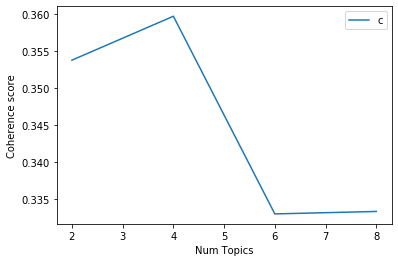

In [27]:
# Show graph

import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [28]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3538
Num Topics = 4  has Coherence Value of 0.3598
Num Topics = 6  has Coherence Value of 0.333
Num Topics = 8  has Coherence Value of 0.3333


<b>2) Optimal # of topics with TFIDF vectors<b>

In [30]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10, 2):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_reviews_lem_tfidf= gensim.models.ldamodel.LdaModel(corpus=vec_lem_with_tfidf, id2word=dict_lem, num_topics=10)
    coherencemodel = CoherenceModel(model=lda_reviews_lem_tfidf, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_reviews_lem_tfidf)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-03-19 00:10:55.240337
#Topics: 2 Score: 0.3908468404947558
#Topics: 4 Score: 0.37241569791067913
#Topics: 6 Score: 0.37293782542109283
#Topics: 8 Score: 0.35557319353819283
2020-03-19 00:11:05.271459


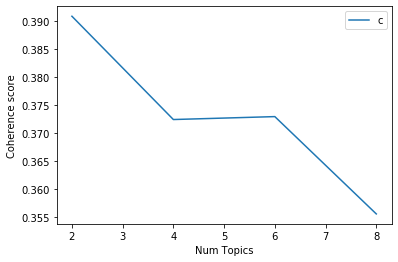

In [32]:
# Show graph

import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [33]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3908
Num Topics = 4  has Coherence Value of 0.3724
Num Topics = 6  has Coherence Value of 0.3729
Num Topics = 8  has Coherence Value of 0.3556


# <b>- END HERE BECAUSE RESULT ARE NOT GOOD-<b>

# Coherence Score - dont think need this

In [39]:
from gensim.models import CoherenceModel

In [40]:
# Compute Coherence score for lemmatising -tf only
coherence_model_lda_lem = CoherenceModel(model=lda_reviews_lem, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
coherence_lda_lem = coherence_model_lda_lem.get_coherence()
print('\nCoherence Score LDA-lem: ', coherence_lda_lem)



Coherence Score LDA-lem:  0.33391604427395644


In [ ]:
# # Compute Coherence score for lemmatising- tfidf only
# coherence_model_lda_lem_tfidf = CoherenceModel(model=lda_reviews_lem_tfidf, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
# coherence_lda_lem_tfidf = coherence_model_lda_lem_tfidf.get_coherence()
# print('\nCoherence Score LDA-lem: ', coherence_lda_lem_tfidf)


# Most Dominant Topic for each Document

In [ ]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[1] where the number of topics is 4

df_topic_sents_keyw = format_topics_sentences(ldamodel=model_list[2], corpus=vec_lem, data=doc_lem)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

# Save Model

In [ ]:
#Save a model to disk, or reload a pre-trained model
lda_lem_tfidf=ldamallet #Or you can save the best model, model_list[1] lda_lem_mallet_tfidf

lda_lem_tfidf.save("lda_lem_tfidf")

lda_disk=gensim.models.wrappers.LdaMallet.load("lda_lem_tfidf")